<a href="http://cocl.us/pytorch_link_top">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/Pytochtop.png" width="750" alt="IBM Product " />
</a> 

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/cc-logo-square.png" width="200" alt="cognitiveclass.ai logo" />

<h1> Autoencoders as Matrices </h1> 

<h2>Table of Contents</h2>
<p>In this lab, we will look at autoencoders as matrices. We will see how changing the shape in the shape of the latent space will changing the shape output. 
  </p>

<ul>
    <li><a href="#2D">Autoencoders with 2D Latent Space as Matrice</a></li>
    <li><a href="#1D"> Autoencoders with 1D Latent Space as Matrices </a></li>
 
</ul>

<p>Estimated Time Needed: <strong>30 min</strong></p>

<hr>

We'll need the following libraries:

In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns

<h2 id="2D">Autoencoders with 2D Latent Space as Matrices</h2>

Create an Autoencoder custom module  or class:

In [2]:
class AutoEncoder(nn.Module):
    
    def __init__(self, input_dim=256, encoding_dim=32):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Linear(input_dim, encoding_dim, bias=False)
        self.decoder = nn.Linear(encoding_dim, input_dim, bias=False)
        
    def forward(self,x):
        return self.decoder(self.encoder(x))

We Create an Autoencoder object with a 2D input and 2D latent space as shown in the image.

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/DL0110EN/Version_3/Chapter_10/images/autencoderlinear2_2_2.png" width="500" alt="cognitiveclass.ai logo" />

In [15]:
auto_encoder_2Dcode = AutoEncoder(2, 2)
auto_encoder_2Dcode

AutoEncoder(
  (encoder): Linear(in_features=2, out_features=2, bias=False)
  (decoder): Linear(in_features=2, out_features=2, bias=False)
)

As the weights are randomly initialized, we set them the orthogonal basis in the video for the encoder. As PyTorch treats the input as rows, we transpose all the wights.
<p>
   $\quad
    \boldsymbol W= \begin{pmatrix} \frac{1}{\sqrt{2}}& \frac{1}{\sqrt{2}} \\
                             -\frac{1}{\sqrt{2}}  & \frac{1}{\sqrt{2}} \end{pmatrix}  $ 
    


In [16]:
print("encoder weight installation: ", auto_encoder_2Dcode.state_dict()['encoder.weight']) # Random weights given by PyTorch

W = torch.tensor([[0.5**0.5, 0.5**0.5], [-0.5**0.5, 0.5**0.5]])
auto_encoder_2Dcode.state_dict()['encoder.weight'].data[:,:] = W # Initialize weights of encoder to orthonormal basis.

print("New encoder weight: ", auto_encoder_2Dcode.state_dict()['encoder.weight'])

encoder weight installation:  tensor([[-0.1453,  0.5388],
        [ 0.1605,  0.5070]])
New encoder weight:  tensor([[ 0.7071,  0.7071],
        [-0.7071,  0.7071]])


we will do the same for the decoder;
<p>
    <p>
   $\quad
    \boldsymbol W^T= \begin{pmatrix} \frac{1}{\sqrt{2}}& -\frac{1}{\sqrt{2}} \\
                             \frac{1}{\sqrt{2}}  & \frac{1}{\sqrt{2}} \end{pmatrix}  $ 

In [ ]:
auto_encoder_2Dcode.state_dict()['decoder.weight'].data[:,:]=torch.transpose(W,0,1)
auto_encoder_2Dcode.state_dict()

In [19]:
print("decoder weight installation: ", auto_encoder_2Dcode.state_dict()['decoder.weight'])

auto_encoder_2Dcode.state_dict()['decoder.weight'].data[:,:] = torch.transpose(W,0,1)

print("decoder weight installation: ", auto_encoder_2Dcode.state_dict()['decoder.weight'])

decoder weight installation:  tensor([[-0.1494,  0.6454],
        [ 0.3615,  0.2101]])
decoder weight installation:  tensor([[ 0.7071, -0.7071],
        [ 0.7071,  0.7071]])


we can  get the encoder output  or code as follows:

In [24]:
x = torch.tensor([[1.0, 1.0]])
z = auto_encoder_2Dcode.encoder(x)
print(z) # Note it is maped to a line.

tensor([[1.4142, 0.0000]], grad_fn=<MmBackward>)


we can generate the outputs; it's identical to the input:

In [27]:
x_hat = auto_encoder_2Dcode.decoder(z)
print(x_hat) # NOtice it is identical to the input.

tensor([[1.0000, 1.0000]], grad_fn=<MmBackward>)


We can produce the output by calling the forward function:

In [29]:
print(auto_encoder_2Dcode.forward(x))
print(auto_encoder_2Dcode(x))

tensor([[1.0000, 1.0000]], grad_fn=<MmBackward>)
tensor([[1.0000, 1.0000]], grad_fn=<MmBackward>)


we can generate the code for multiple samples:

In [30]:
X = torch.tensor([[1.0,0],[0,1],[-1.0,0],[0,-1.0],[1,1],[-1,1],[1,-1],[-1,-1]])
Z = auto_encoder_2Dcode.encoder(X) # PyTorch treats each row of X as separate inputs.
print(Z) # Notice the mapping to the latent space is a rotation indicated by the new orthonormal basis.

tensor([[ 0.7071, -0.7071],
        [ 0.7071,  0.7071],
        [-0.7071,  0.7071],
        [-0.7071, -0.7071],
        [ 1.4142,  0.0000],
        [ 0.0000,  1.4142],
        [ 0.0000, -1.4142],
        [-1.4142,  0.0000]], grad_fn=<MmBackward>)


We see the output is the same as the code:

In [31]:
Xhat = auto_encoder_2Dcode(X)
print('Xhat:')
print(Xhat)
print('X')
print(X) # We did not lose any information due to the shape of the encoder and decoder.

Xhat:
tensor([[ 1.0000,  0.0000],
        [ 0.0000,  1.0000],
        [-1.0000,  0.0000],
        [ 0.0000, -1.0000],
        [ 1.0000,  1.0000],
        [-1.0000,  1.0000],
        [ 1.0000, -1.0000],
        [-1.0000, -1.0000]], grad_fn=<MmBackward>)
X
tensor([[ 1.,  0.],
        [ 0.,  1.],
        [-1.,  0.],
        [ 0., -1.],
        [ 1.,  1.],
        [-1.,  1.],
        [ 1., -1.],
        [-1., -1.]])


We see the output is the same as the code:

The following plot shows the input space and tensors or vectors on the left. The latent space and the code are on the right. Finally we have the code. The corresponding samples are/' colour coded accordingly.

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding

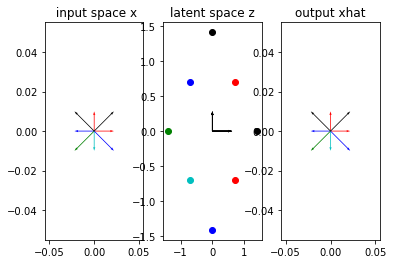

In [33]:
colors=['r','r','b','c','k','k','b','g','r'] 

for x,z,xhat,c in zip(X,Z,Xhat,colors):
    plt.subplot(131)
    
    plt.quiver([0],[0],x[0].numpy(),x[1].numpy(),scale=5,color=c)
    plt.title(' input space x') 
    plt.subplot(132)
    plt.plot(z[0].detach().numpy(),z[1].detach().numpy(),c+'o')
    plt.quiver([0],[0],0,1,scale=5,color='k')
    plt.quiver([0],[0],1,0,scale=5,color='k')
    plt.title('latent space z')
    plt.subplot(133)
    plt.quiver([0],[0],x[0].numpy(),x[1].numpy(),scale=5,color=c)

    plt.title('output xhat')
  
plt.show()

<h2 id="#1D"> Autoencoders with 1D Latent Space as Matrices</h2>

We Create an Autoencoder object with a 2D input and 1D latent space. The figure below is wrong, the encoder should only be one neuron.

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/DL0110EN/Version_3/Chapter_10/images/under_complete.png" width="500" alt="cognitiveclass.ai logo" />

In [34]:
auto_encoder_1Dcode = AutoEncoder(2,1)
print(auto_encoder_1Dcode)

AutoEncoder(
  (encoder): Linear(in_features=2, out_features=1, bias=False)
  (decoder): Linear(in_features=1, out_features=2, bias=False)
)


In [39]:
W = torch.tensor([[0.5**0.5, 0.5**0.5]])
auto_encoder_1Dcode.state_dict()['encoder.weight'].data[:,:] = W
auto_encoder_1Dcode.state_dict()['decoder.weight'].data[:,:] = torch.transpose(W,0,1)

we can plot the data.

In [41]:
z = auto_encoder_1Dcode.encoder(torch.tensor([[1.0, 1.0]]))
print(z)

tensor([[1.4142]], grad_fn=<MmBackward>)


we can generate the outputs; it's identical to the input:

In [42]:
x_hat = auto_encoder_1Dcode.decoder(z)
print(x_hat)

tensor([[1.0000, 1.0000]], grad_fn=<MmBackward>)


We can produce the output by calling the forward function:

In [44]:
x_hat = auto_encoder_1Dcode(torch.tensor([[1.0, 1.0]]))
print(x_hat)

tensor([[1.0000, 1.0000]], grad_fn=<MmBackward>)


we can generate the code for multiple samples:

In [45]:
X = torch.tensor([[1.0,0],[0,1],[-1,0],[0,-1],[1,1],[-1,1],[1,-1],[-1,-1]])
Z = auto_encoder_1Dcode.encoder(X)
Z

tensor([[ 0.7071],
        [ 0.7071],
        [-0.7071],
        [-0.7071],
        [ 1.4142],
        [ 0.0000],
        [ 0.0000],
        [-1.4142]], grad_fn=<MmBackward>)

The output is not the same, as there is not enough information to pass-through the encoder. As a result, all the output is vectors are scalar multiples of the vector $[1,1]$. 


In [46]:
Xhat = auto_encoder_1Dcode(X)
print('Xhat:')
print(Xhat)
print('X')
print(X)

Xhat:
tensor([[ 0.5000,  0.5000],
        [ 0.5000,  0.5000],
        [-0.5000, -0.5000],
        [-0.5000, -0.5000],
        [ 1.0000,  1.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [-1.0000, -1.0000]], grad_fn=<MmBackward>)
X
tensor([[ 1.,  0.],
        [ 0.,  1.],
        [-1.,  0.],
        [ 0., -1.],
        [ 1.,  1.],
        [-1.,  1.],
        [ 1., -1.],
        [-1., -1.]])


The following plot shows the input space and tensors or vectors on the left. The latent space and the code are on the right. Finally we have the code each point vector is mapped to a point on a 1D line. Finally, we have  the output all the vectors span the line equivalent to $y=x$ or a scaler multiple of the vector $[1,1]$. The corresponding samples are/' colour coded accordingly.

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding

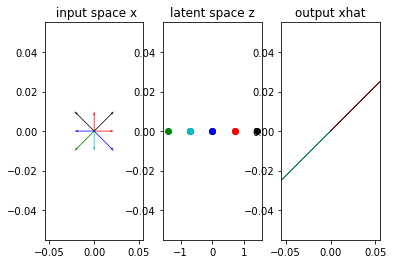

In [47]:
colors = ['r','r','b','c','k','k','b','g','r'] 

for x,z,xhat,c in zip(X,Z,Xhat,colors):
    plt.subplot(131)
    
    plt.quiver([0],[0],x[0].numpy(),x[1].numpy(),scale=5,color=c)
    plt.title(' input space x') 
    plt.subplot(132)
    plt.plot(z[0].detach().numpy(),0,c+'o')

    plt.title('latent space z')
    plt.subplot(133)
    plt.quiver([0],[0],10*xhat[0].detach().numpy(),10*xhat[1].detach().numpy(),scale=5,color=c)

    plt.title('output xhat')
  
plt.show()

<!--Empty Space for separating topics-->

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

<hr>

Copyright &copy; 2020 <a href="cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu">cognitiveclass.ai</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.